# Graphillionの内部

Graphillionを用いることでなぜ数え上げお姉さん問題を効率的に解けるのかを知るためには，Graphillionの内部構造を知ることが不可欠です．Graphillionの内部では**ゼロサプレス型二分決定グラフ（ZDD）**とよばれるデータ構造が利用されています．ZDDを用いると，グラフ集合を非常に小さな形で表現することができます．さらに，グラフ集合に対する各種演算を効率的に実行することも可能です．

なお，GraphillionからはZDDの存在は完全に隠蔽されており，ZDDの存在を意識せずとも利用できるようになっています．一方で，Graphillionをより使いこなすためにはZDDを理解することが重要となってきます．

## ゼロサプレス型二分決定グラフ (ZDD)

まずZDDについて簡単に解説します．より詳しい説明は文献などを参照ください．ZDDは組合せの集合をグラフの形で表現するデータ構造です．Graphillionはグラフの集合をZDDという別のグラフを用いて表しているといえます．ちょっとややこしいですね．

いま3つの数字 1, 2, 3に対して，組合せ $\{1, 2\}, \{2, 3\}, \{3, 1\} $  からなる集合を考えます．この集合をZDDを用いて表すと，下の図のようになります．

![sample_zdd](img/05/sample_zdd.png)

ZDDは楕円と長方形の2種類の頂点と，破線と実践の矢印（有向辺）からなる有向グラフです．楕円形の頂点に記載された数字はその頂点が対応する要素を表現しています．3つの組合せ$\{1, 2\}, \{2, 3\}, \{3, 1\} $ は，ZDDの最上位の頂点（根とよぶ）から1と書かれた最下位の頂点までの3つの経路にそれぞれ対応しています．各経路に対して，経路中に含まれるある頂点から，実践の辺をたどって次の頂点に移動したときに，その頂点に記されている要素が組合せに含まれるとすると，経路から対応する組合せを得ることができます．

例えば，根から実践，破線，実践の順に辺を辿る経路は1と書かれた終端頂点に到達します．この経路は１, 3を含んで2を含まない組合せ$\{1, 3\}$を表現しています．

ZDDは組合せの集合を有向グラフ中の経路の集まりとして表現します．この表現の利点として，多数の組合せからなる集合を小さなグラフとして表現できるという点が挙げられます．

![saple_zdd_dense](img/05/sample_zdd_dense.png)

上の図は，組合せ$\{\}, \{1\}, \{2\}, \{3\}, \{1, 2\}, \{2, 3\}, \{1, 3\}, \{1, 2, 3\}$からなる組合せの集合を表すZDDです．4つの頂点からなるZDDで8個の組合せからなる集合を表現できるため，組合せの集合を簡潔に表現できます．

## GraphillionとZDD

ZDDがGraphillion中でどのように利用されているかをみていきます．Graphillonの`GraphSet` クラスはグラフの集合を表現していると[前章](04_graphillion_first_step.ipynb)で説明しました．`GraphSet`オブジェクトはグラフの集合をZDDとして表現しています．

具体的な例を見てみましょう．Graphillionでは `GraphSet`の内部のZDDを明示的に取り出すためのメソッドは提供されていないので，ZDDを取り出すための関数を`tutorial_util.py`に準備しました．まずは前章と同様にグリッドグラフの対角頂点間を結ぶ経路の集合を表す`GraphSet`を求めてみましょう．

In [2]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_zdd, zdd_size, draw_subgraph

まずは`universe`を設定します．今回は小さいグリッドグラフを設定します．

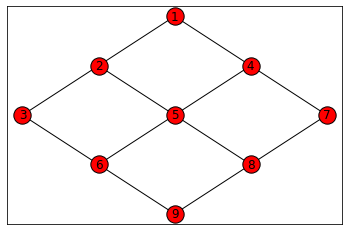

In [4]:
grid = tutorial.grid(2, 2)
GraphSet.set_universe(grid)
draw_subgraph(GraphSet.universe())

次に対角頂点間を結ぶ経路の集合を表す`GraphSet`オブジェクトを作成します．

In [10]:
paths =  GraphSet.paths(1, 9)
len(paths)

12

`paths`は12個の経路からなる`GraphSet`オブジェクトです．では`paths`に対応するZDDをみてみましょう．

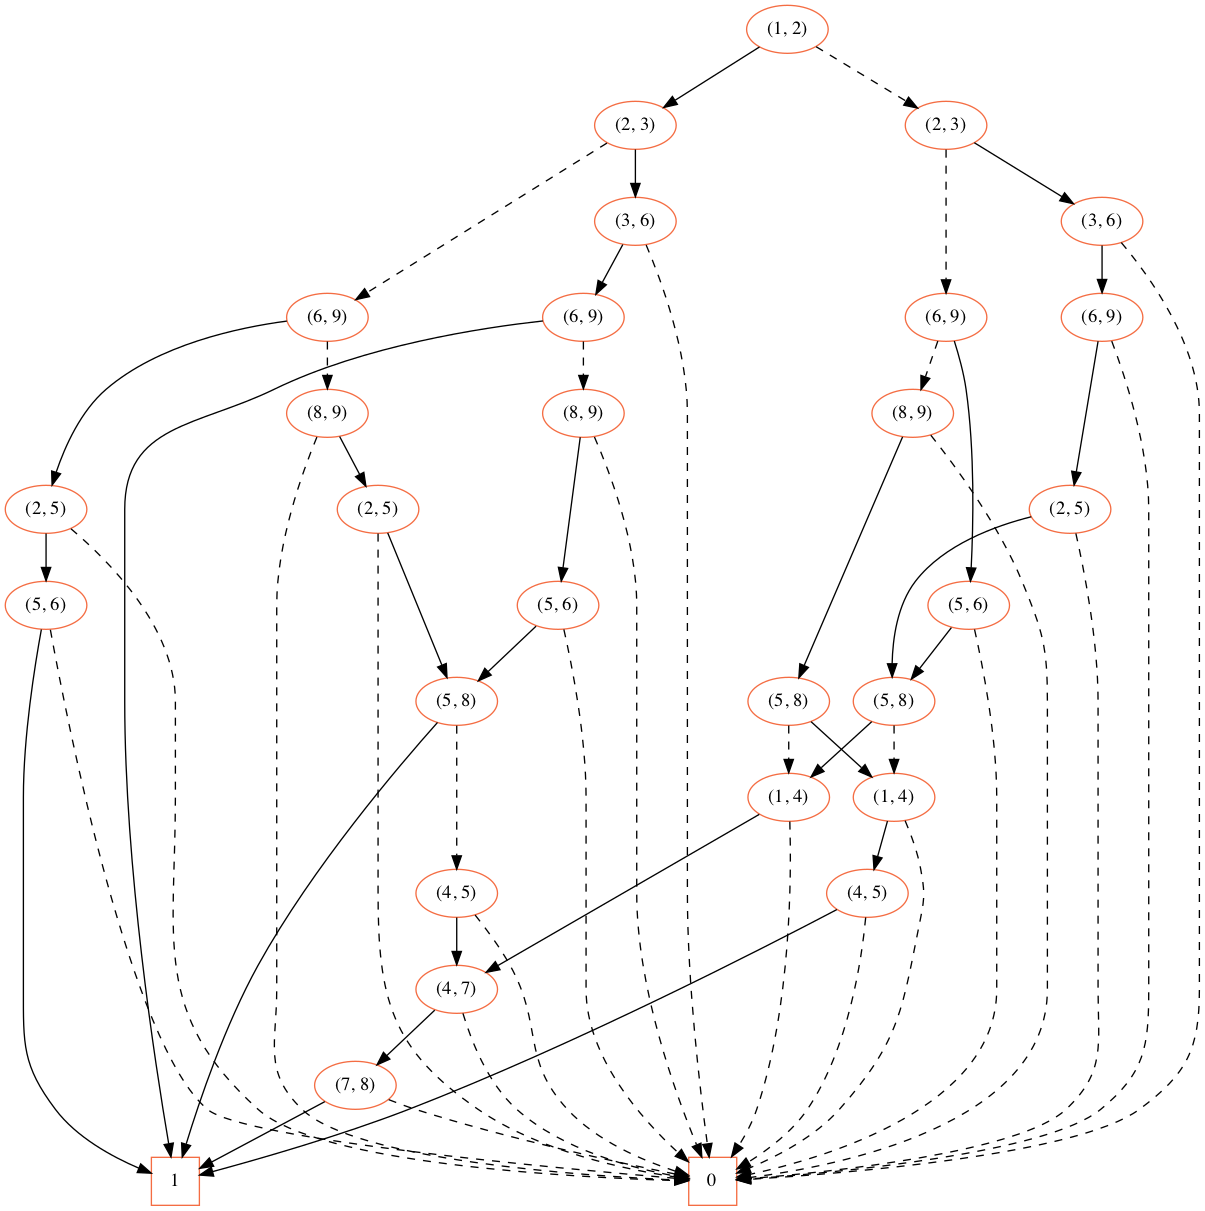

In [13]:
draw_zdd(paths, GraphSet.universe())

`draw_zdd(paths, universe)`は，このチュートリアルのために用意した`paths`に対応するZDDを描画するメソッドです．`GraphSet`はグラフ集合を辺の組合せの集合として表現しています．そのため，ZDDの楕円ノードのラベルは`universe`中の各辺に対応しています．

上のZDDを見てみると，根から1終端頂点までの経路が全部で12通りあることが分かります．この各経路が`paths`が表すグラフ集合に含まれる部分グラフに対応しています．

次にこのZDDの大きさを見てみましょう．ZDDのノード数は`zdd_size`メソッドで確認できます．

In [14]:
zdd_size(paths)

27

12個の経路の集合を表す`paths`を27頂点からなるZDDとして表現できていることが分かります．この例だとZDDを内部表現として用いることの嬉しさが分かりづらいですね．

次の例ではZDDの効果はより顕著になります．

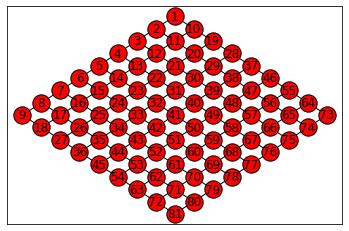

In [16]:
GraphSet.set_universe(tutorial.grid(8, 8))
paths = GraphSet.paths(1, 81)
draw_subgraph(GraphSet.universe())

 8x8グリッドグラフだと経路の総数は指数的に増加します．

In [17]:
len(paths)

3266598486981642

一方，`paths`を表すZDDの頂点数は，経路の総数と比べて大幅に小さな値になります．

In [18]:
zdd_size(paths)

194351

このように，膨大な数の部分グラフからなるグラフ集合をZDDを用いることで小さく表現することによって，Graphillionは数え上げお姉さん問題を高速に解くことができます．

なぜZDDはお姉さん問題の解の集合を小さく表現できるのでしょうか．それは，お姉さん問題の解である部分グラフ集合中に似た部分グラフが多数存在するからです．似た部分グラフはZDDの根から1-終端頂点までの経路の形で表現しても共通する部分が多い経路となります．ZDDは共通する経路をまとめあげて表現できるため，対象のグラフ集合を小さく表現できるのです．

## ZDDの利点

ZDDを用いることの利点はグラフ集合を小さく表現できるだけではありません．ZDDが備えている重要な特徴として，ZDDの大きさに比例する時間で様々な演算を実行できるというものがあります．代表的な例として，ZDDには，含まれる要素の数を効率的に数え上げられるという特徴があります．Graphillionでは，`GraphSet`オブジェクト`gs`に対して`len(gs)`を実行することで，`gs`に含まれる部分グラフの数を求めることができますが，この計算にもZDDが活用されています．

辺の重みの和が最小，最大のグラフを求める操作もZDDの頂点数に比例する計算時間で実行できます．この特徴を活用することで最長経路問題のような難しいグラフ上の最適化問題を解くことができます．

そのほかにも，グラフの集合に対して何らかの条件を加えて，別の集合を作り出すようなことも可能です．次章で紹介する`GraphSet`クラスのメソッド群には，ほぼすべて対応するZDDの演算が存在します．

このように，組合せの集合を圧縮して表現した上で，圧縮した表現に比例する時間で様々な計算を柔軟に実行できることがZDDの最大の利点です．

## ZDDの欠点
ZDDはグラフの集合を圧縮して表現し，ZDDの大きさに比例する計算時間で様々な計算を実行できる道具です．つまり，グラフの集合を表現するZDD自体が巨大になるケースでは計算に時間がかかるという課題があります．具体的には
- `universe`が1000頂点以上．
- `universe`が密なグラフ（辺の数が頂点の数よりもずっと大きい）

といったケースでZDDが巨大になり，現実的な時間で計算ができない傾向があります．

また，`GraphSet`オブジェクトに対して行う演算によってどれだけZDDの大きさが増減するのかが予想しづらいという欠点もあります．[9章](09_graphillion_practical_guide.ipynb) ではGraphillionを現実の問題に適用する際の指針について説明します．

## まとめ
この章ではGraphillionの内部で利用されているデータ構造であるZDDについて解説しました．GraphillionにはZDDに関する最新の研究成果が詰め込まれています．技術的な詳細に興味のある方は[超高速グラフ列挙アルゴリズムの書籍](https://www.morikita.co.jp/books/book/2838) をご参照ください．

次章以降ではGraphillionを用いて問題を解く方法をいくつか紹介します．まず[次章](06_grpah_set.ipynb) で`GraphSet`クラスの機能と，Graphillionを用いた問題解決の流れについて説明します．
